In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, UpSampling2D, Activation, Dropout
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Image Colourization/Landscape_Images'

train_datagen = ImageDataGenerator(rescale=1. / 255)

train = train_datagen.flow_from_directory(path, target_size=(128, 128), batch_size=8000, class_mode=None)


Found 12745 images belonging to 2 classes.


In [ ]:
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128 ) 
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,))
print(X.shape)
print(Y.shape)

(8000, 128, 128, 1)
(8000, 128, 128, 2)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides = 2))
model.add(Conv2D(64, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 256)       5

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
model.compile( loss='mse' , metrics=['accuracy'])

Epoch 1/100
36/36 [==============================] - 14s 384ms/step - loss: 0.0169 - accuracy: 0.5312 - val_loss: 0.0131 - val_accuracy: 0.5436
Epoch 2/100
36/36 [==============================] - 14s 388ms/step - loss: 0.0156 - accuracy: 0.5435 - val_loss: 0.0130 - val_accuracy: 0.5622
Epoch 3/100
36/36 [==============================] - 14s 398ms/step - loss: 0.0134 - accuracy: 0.5637 - val_loss: 0.0128 - val_accuracy: 0.5697
Epoch 4/100
36/36 [==============================] - 14s 397ms/step - loss: 0.0126 - accuracy: 0.5986 - val_loss: 0.0117 - val_accuracy: 0.6501
Epoch 5/100
36/36 [==============================] - 14s 392ms/step - loss: 0.0125 - accuracy: 0.5957 - val_loss: 0.0122 - val_accuracy: 0.6041
Epoch 6/100
36/36 [==============================] - 14s 388ms/step - loss: 0.0123 - accuracy: 0.6120 - val_loss: 0.0114 - val_accuracy: 0.6589
Epoch 7/100
36/36 [==============================] - 14s 386ms/step - loss: 0.0127 - accuracy: 0.6131 - val_loss: 0.0116 - val_accuracy:

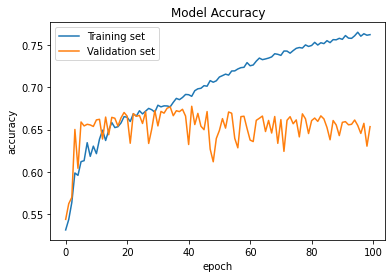

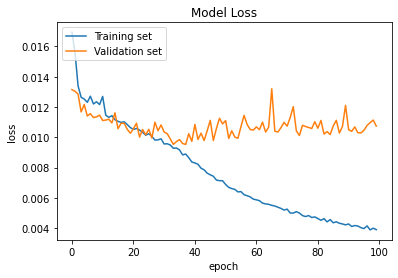

In [ ]:
history = model.fit(X,Y,validation_split=0.1, epochs=100, batch_size=200)

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Image Colourization/Landscape_Model/Colourizer4(Landscape)')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Image Colourization/Landscape_Model/Colourizer4(Landscape)/assets


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Image Colourization/Landscape_Model/Colourizer4(Landscape)')

In [ ]:
def predict(filename):
  img1_color=[]
  img1=img_to_array(load_img(filename))
  img1 = resize(img1 ,(128,128))
  img1_color.append(img1)
  img1_color = np.array(img1_color, dtype=float)
  img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
  img1_color = img1_color.reshape(img1_color.shape+(1,))
  output1 = model.predict(img1_color)
  output1 = output1*128
  result = np.zeros((128, 128, 3))
  result[:,:,0] = img1_color[0][:,:,0]
  result[:,:,1:] = output1[0]
  img= load_img(filename)
  img2 = lab2rgb(result)
  Titles =["Original", "Prediction"]
  images =[img, img2]
  count = 2
  
  for i in range(count):
      plt.subplot(1, 2, i + 1)
      plt.title(Titles[i])
      plt.imshow(images[i])
  
  plt.show()
 

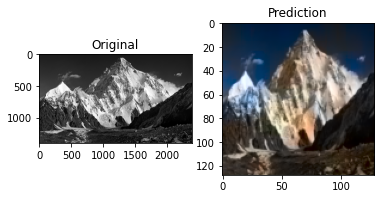

In [ ]:
predict('/content/Test/Test_image.jpg')

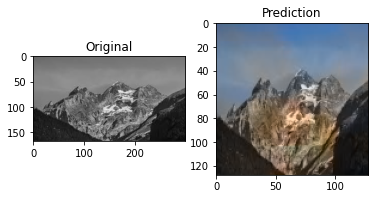

In [ ]:
predict('/content/Testimage/Test.jpg')

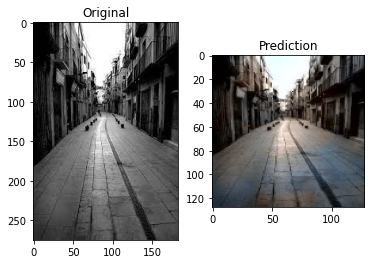

In [ ]:
predict('/content/Test_Images/Test_image3.jpg')

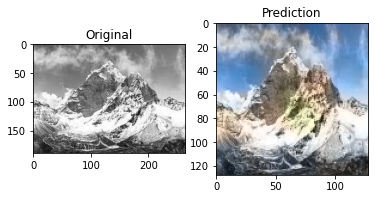

In [ ]:
predict('/content/Test_Images/Test_image4.jpg')

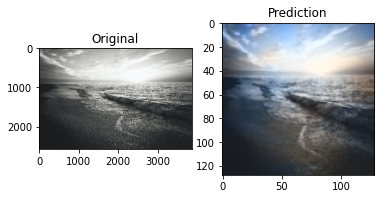

In [ ]:
predict('/content/Test_Images/test_image5.jpg')

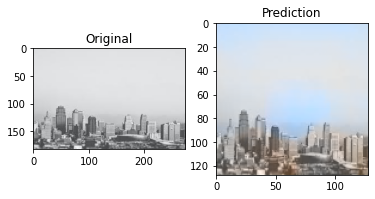

In [ ]:
predict('/content/Test_Images/Test_Image6.jpg')